# Calculate mean and variance

In [14]:
# calculating the mean value of list of numbers
def mean(values):
    return sum(values) / float(len(values))

# calculating the variance of list of numbers
def variance(values,mean):
    return sum([(x - mean)**2 for x in values])

dataset = [[1,1],[2,3],[4,3],[3,2],[5,5]]

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]

mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x,mean_x), variance(y,mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x,var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y,var_y))


x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


# Calculate Covariance

In [15]:
# calculating covariance between x and y

def covariance(x,mean_x,y,mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

covar = covariance(x,mean_x,y,mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 8.000


# Estimating Coefficients

In [16]:
# calculating coefficients

def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x),mean(y)
    b1 = covariance(x,x_mean,y,y_mean) / variance(x,x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0,b1]

b0,b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0,b1))

Coefficients: B0=0.400, B1=0.800


# Make Predictions

In [17]:
def simple_linear_regression(train,test):
    predictions = list()
    b0,b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Complete Simple Linear Regression

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
[1, 3, 3, 2, 5]


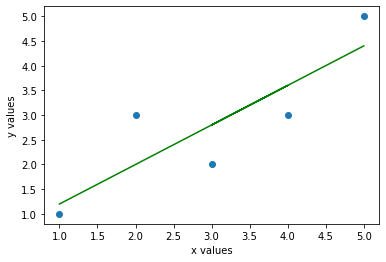

RMSE: 0.693


In [19]:
from math import sqrt
import matplotlib.pyplot as plt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        #print(row_copy)
        row_copy[-1] = None
        test_set.append(row_copy)
        #print(test_set)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    print(actual)
    x = [row[0] for row in dataset]
    plt.scatter(x,actual)
    plt.plot(x,predicted,color='green')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.show()
    rmse = rmse_metric(actual, predicted)
    return rmse
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

